In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN, Birch
import seaborn as sns
from tqdm import tqdm

## Pipeline

In [2]:
## Compute Correlation
def computeCor(df, name):

    df_cor = df.corrwith(df.loc["%s"%name], axis=1)
    df_cor = df_cor.to_frame()
    df_cor.columns = ["%s"%name]

    return df_cor

def computeDist(df, name):
    
    ## Store dist value
    dist_all = []
    for i in range(len(df)):
        dst = df.iloc[name,:] - df.iloc[i,:]
        dist = np.linalg.norm(dst)
        dist_all.append(dist)

    return dist_all

## Load data

In [3]:
## Load data
df_all = pd.read_csv("../ProcessedData/LCTs/LCPM_all.csv")

df = pd.read_csv("../ProcessedData/LCTs/LCPM.csv")
df = df.set_index('name')

## Compute Similarity

### Correlation

In [4]:
## Select characters' name
character_names = df_all.name.to_list()
## Set index
df_all_cor = df_all.copy().set_index("name")
## Store correlation matrix
correlation_matrix = []
for character_name in tqdm(character_names):
    df_cor = computeCor(df_all_cor, character_name)
    correlation_matrix.append(df_cor)
correlation_matrix = pd.concat(correlation_matrix, axis=1)
## Round Value
correlation_matrix = correlation_matrix.round(3)

100%|██████████| 21/21 [00:00<00:00, 189.69it/s]


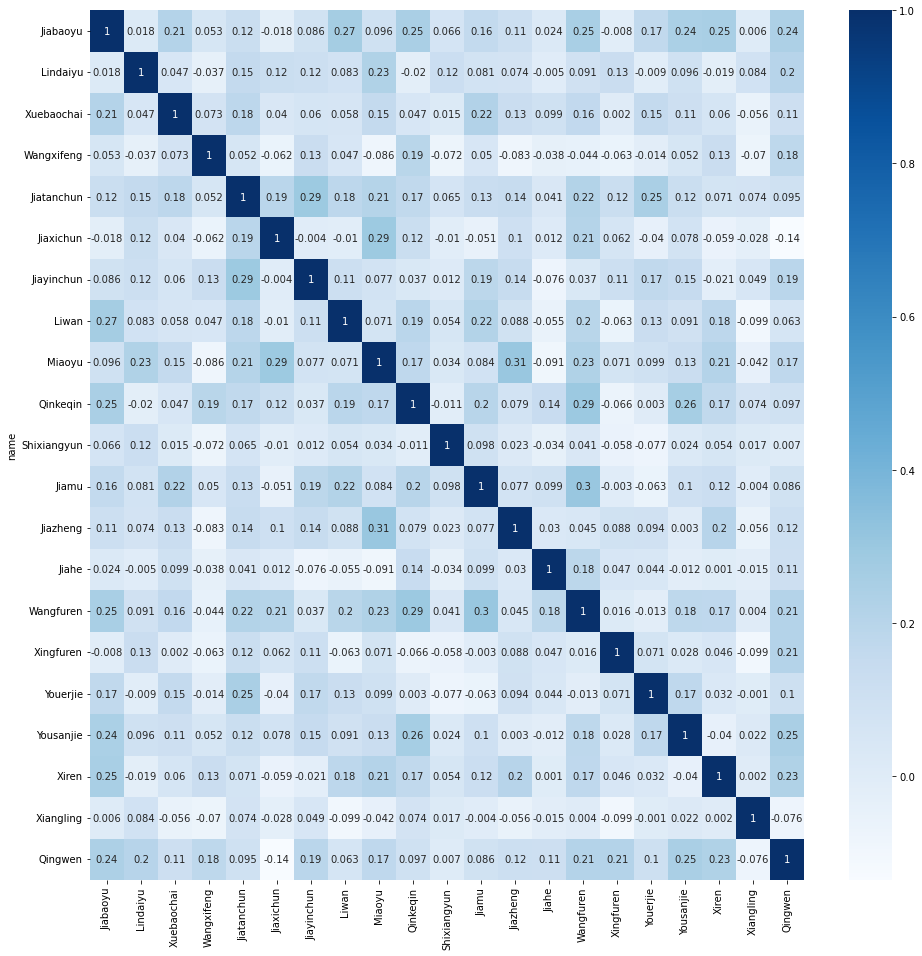

In [5]:
# plot the heatmap
plt.figure(figsize=(16,16))
sns.heatmap(correlation_matrix, 
        xticklabels=correlation_matrix.columns,
        yticklabels=correlation_matrix.columns,
        annot=True,
        cmap="Blues")
plt.savefig("../Images/CharacterHeatMap.png")

### Compute Euclidean Metric

In [6]:
## Set Index
df_all_dist = df_all.copy().set_index("name")
## Compute each character's distance
df_dist_all = []
for i in tqdm(range(len(character_names))):
    df_dist = computeDist(df_all_dist, i)
    df_dist = pd.DataFrame (df_dist, columns = ["%s"%character_names[i]])
    df_dist.index = character_names
    df_dist_all.append(df_dist)
df_dist_all = pd.concat(df_dist_all, axis=1)
## Round Value
df_dist_all = df_dist_all.round(3)

100%|██████████| 21/21 [00:00<00:00, 118.29it/s]


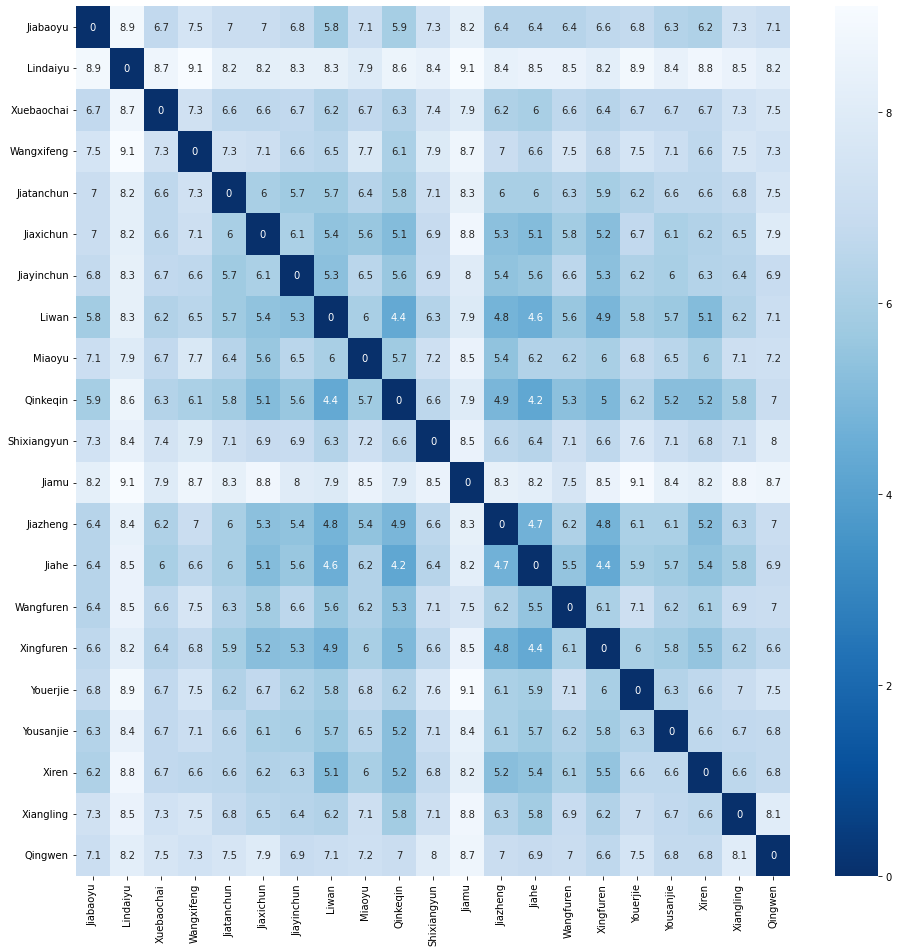

In [7]:
# plot the heatmap
plt.figure(figsize=(16,16))
sns.heatmap(df_dist_all, 
        xticklabels=correlation_matrix.columns,
        yticklabels=correlation_matrix.columns,
        annot=True,
        cmap="Blues_r")
plt.savefig("../Images/CharacterHeatMap_dist.png")

### Croup character

In [8]:
## Group by correlation
group1 = correlation_matrix['Jiabaoyu'].nlargest(n=4)
group2 = correlation_matrix['Lindaiyu'].nlargest(n=4)
group3 = correlation_matrix['Xuebaochai'].nlargest(n=4)
group4 = correlation_matrix['Wangxifeng'].nlargest(n=4)
group5 = correlation_matrix['Shixiangyun'].nlargest(n=4)

## Group by dist
group1_dist = df_dist_all['Jiabaoyu'].nsmallest(n=10)
group2_dist = df_dist_all['Lindaiyu'].nsmallest(n=10)
group3_dist = df_dist_all['Xuebaochai'].nsmallest(n=10)
group4_dist = df_dist_all['Wangxifeng'].nsmallest(n=10)
group5_dist = df_dist_all['Shixiangyun'].nsmallest(n=10)

# Group
manul_group1 = ["Jiabaoyu", "Liwan", "Xiren", "Wangfuren"]
manul_group2 = ["Lindaiyu", "Miaoyu", "Qingwen", "Jiatanchun", "Xingfuren"]
manul_group3 = ["Xuebaochai", "Jiamu", "Youerjie", "Jiazheng"]
manul_group4 = ["Wangxifeng", "Qinkeqin", "Jiayinchun", "Yousanjie"]
manul_group5 = ["Shixiangyun", "Xiangling", "Jiaxichun", "Jiahe"] 

# True cluster
true_list = [0 for i in range(21)]
# Group1
true_list[0] = 0;true_list[7] = 0;true_list[18] = 0;true_list[14] = 0
# Group2
true_list[1] = 1;true_list[8] = 1;true_list[20] = 1;true_list[4] = 1;true_list[15] = 1
# Group3
true_list[2] = 2;true_list[11] = 2;true_list[16] = 2;true_list[12] = 2
# Group4
true_list[3] = 3;true_list[9] = 3;true_list[6] = 3;true_list[17] = 3
# Group5
true_list[10] = 4;true_list[19] = 4;true_list[5] = 4;true_list[13] = 4

## Unsupervised cluster

### K-Means

In [12]:
##
df = pd.read_csv("../ProcessedData/LCTs/LCPM_m.csv")
df = df.set_index('name')

In [26]:
## Generate model
k_mean = KMeans(n_clusters=5)
## Train model
k_mean.fit(df)
## Evaluation
print('The id of the nest to which the model test set predictions belong: {}'.format(k_mean.predict(df))) 
print('Opposite of the loss function of the model test set: {}'.format(k_mean.score(df)))
print('The model training data corresponds to the nest subscript: {}'.format(k_mean.labels_))      
print('Minimum value of loss function for model training data: {}'.format(k_mean.inertia_))

The id of the nest to which the model test set predictions belong: [1 4 3 2 4 0 2 1 4 2 0 3 3 0 1 4 3 2 1 0 4]
Opposite of the loss function of the model test set: -32.5
The model training data corresponds to the nest subscript: [1 4 3 2 4 0 2 1 4 2 0 3 3 0 1 4 3 2 1 0 4]
Minimum value of loss function for model training data: 32.5


[450.673076923077, 258.16666666666663, 73.91666666666667, 32.5, 21.75, 12.499999999999998, 8.416666666666666, 6.25]


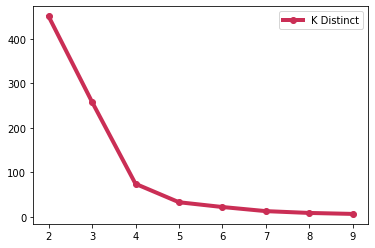

In [25]:
## Elbow method of selecting k values
distinct = []
number_k = [i for i in range(2,10)]
for k in number_k:
    k_means = KMeans(n_clusters=k)
    k_means.fit(df)
    distinct.append(k_means.inertia_)
print(distinct)
fig = plt.figure()
plt.plot(number_k,distinct,'o-', color='#CA2E55',label = 'K Distinct', linewidth='4')
plt.legend()
plt.show()

### DBSCAN

In [22]:
clustering_dbscan = DBSCAN(eps=3, min_samples=2).fit(df)
clustering_dbscan.labels_

array([0, 1, 2, 3, 1, 4, 3, 0, 1, 3, 4, 2, 2, 4, 5, 1, 2, 3, 5, 4, 1],
      dtype=int64)

### Brich

In [23]:
clustering_birch = Birch(threshold=0.5, branching_factor=50, n_clusters=5, compute_labels=True, copy=True)
clustering_birch.fit(df)
clustering_birch.predict(df)

array([0, 4, 2, 1, 4, 3, 1, 0, 4, 1, 3, 2, 2, 3, 0, 4, 2, 1, 0, 3, 4],
      dtype=int64)

In [24]:
clustering_birch = Birch(threshold=0.5, branching_factor=50, n_clusters=None, compute_labels=True, copy=True)
clustering_birch.fit(df)
clustering_birch.predict(df)

array([ 0,  1,  2,  3,  4,  5,  3,  6,  7,  8,  5,  9,  9,  5, 10,  7,  2,
        3, 10,  5,  1])

In [215]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score([0, 1, 3], [0, 1, 3])

1.0

## Evaluate

In [30]:
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI, \
        adjusted_mutual_info_score as AMI, adjusted_rand_score as ARI, silhouette_score as SI, calinski_harabasz_score as CH

def clustring_indicators (pred, data=None, labels=None, model_name='cluster', verbose=1):

    measure_dict = dict()
    if data is not None:
        measure_dict['si'] = SI(data, pred)
        measure_dict['ch'] = CH(data, pred)
    if labels is not None:
        measure_dict['nmi'] = NMI(labels, pred)
        measure_dict['ar'] = ARI(labels, pred)
        measure_dict['ami'] = AMI(labels, pred)

    if verbose:
        char = ''
        for (key, value) in measure_dict.items():
            char += '{}: {:.4f} '.format(key, value)
        print('{} {}'.format(model_name, char))

    return measure_dict

In [32]:
## K-MEANS
k_mean = KMeans(n_clusters=5)
k_mean.fit(df)
predict_kmeans = k_mean.predict(df)
## DBSCAN
pred_dbscan = clustering_dbscan.labels_
## BRICH
pred_birch = clustering_birch.predict(df)

In [44]:
clustring_indicators(pred_birch, labels=true_list)

cluster nmi: 0.8234 ar: 0.5399 ami: 0.6376 


{'nmi': 0.8234335964871434,
 'ar': 0.5398773006134969,
 'ami': 0.6375501807649534}